# Altman Z" Score & Credit Ratings
Scores - above 2.6 and the firm was "healthy", between 1.1-2.6 was the "grey area", and below 1.1 and the firm as at risk of bankruptcy.

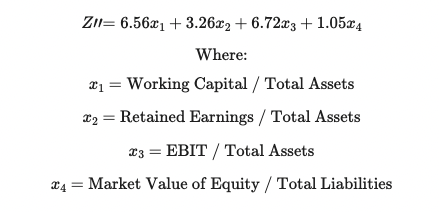

## Calculation Details

In [1]:
import pandas as pd
import pyEX as p
c = p.Client(api_token="pk_353fe2ce67cd4c16b30a748ff783c865", version="v1")

## AAPL as an example

In [2]:
ticker = "aapl"
incomeStatement = c.incomeStatementDF(ticker)
balanceSheet = c.balanceSheetDF(ticker)
cfStatement = c.cashFlowDF(ticker)
stats = c.keyStats(ticker)

In [3]:
# Income Statement
EBIT = incomeStatement["ebit"][0] 
# Balance Sheet
CA = balanceSheet['currentAssets'][0]
CL = balanceSheet['totalCurrentLiabilities'][0]
TA = balanceSheet['totalAssets'][0]
TL = balanceSheet['totalLiabilities'][0]
RE = balanceSheet['retainedEarnings'][0]
# Trading Stats
MVE = stats['marketcap']

In [4]:
print(balanceSheet['currentAssets'][0],',',balanceSheet["totalCurrentLiabilities"][0],',',balanceSheet['totalAssets'][0])

153154000000 , 147574000000 , 381191000000


In [5]:
x1 = ((CA-CL)/TA)
x2 = RE/TA
x3 = EBIT/TA
x4 = MVE/TL

In [6]:
def Z_score(x1,x2,x3,x4):
    return(6.56 * x1 + 3.26 * x2 + 6.72 * x3 + 1.05 * x4)

In [7]:
Z_score(x1,x2,x3,x4)

9.793425587324883

## Define a function that calculates Z"Score, Credit Ratings, Return on Equity with ticker

In [8]:
def altmanZDoublePrime(ticker):
    '''
    Calculate the Altman Z" Score for a given ticker
    
    ticker = string, user input for which to calculate the Z-score. Not case sensitive.
    '''
    import pyEX as p
    c = p.Client(api_token="pk_353fe2ce67cd4c16b30a748ff783c865", version="v1")
    incomeStatement = c.incomeStatementDF(ticker)
    balanceSheet = c.balanceSheetDF(ticker)
    cfStatement = c.cashFlowDF(ticker)
    stats = c.keyStats(ticker)
    
    EBIT = incomeStatement["ebit"][0]
    MVE = stats['marketcap']
    CA = balanceSheet['currentAssets'][0]
    CL = balanceSheet["totalCurrentLiabilities"][0]
    TA = balanceSheet['totalAssets'][0]
    TL = balanceSheet['totalLiabilities'][0]
    RE = balanceSheet['retainedEarnings'][0]
    
    x1 = ((CA-CL)/TA)
    x2 = RE/TA
    x3 = EBIT/TA
    x4 = MVE/TL
    
    return(6.56 * x1 + 3.26 * x2 + 6.72 * x3 + 1.05 * x4)

In [9]:
import numpy as np

def altmanZDPImpliedRating(ticker):
    '''
    Calculate the implied credit rating from a company's Altman Z" Score 
    
    ticker = string, user input for which to calculate the Z-score. Not case sensitive.
    '''
    adjZScore = 3.25 + altmanZDoublePrime( ticker )
    zMap = [ 8.15, 7.6, 7.3, 7., 6.85, 6.65, 6.4, 6.25, 5.85, 5.65, 5.25, 4.95, 4.75, 4.5, 4.15, 3.75, 3.2, 2.5, 1.75 ]
    scores = [ "AAA", "AA+", "AA", "AA-", "A+", "A", "A-", "BBB+", "BBB", "BBB-", "BB+", "BB", "BB-", "B+", "B", "B-", "CCC+", "CCC", "CCC-", "D" ] 
    return scores[ zMap.index( np.array( zMap )[ np.array( zMap ) < adjZScore ].max() ) ]

In [10]:
altmanZDoublePrime('TSLA'),altmanZDPImpliedRating('TSLA')

(28.818678810053015, 'AAA')

In [11]:
list = ['TSLA','BA','AAPL','V']
for stocks in list:
    print(stocks,altmanZDoublePrime(stocks),altmanZDPImpliedRating(stocks))

TSLA 28.818678810053015 AAA
BA 2.5486330141343814 BBB-
AAPL 9.793425587324883 AAA
V 12.293270706403746 AAA


In [12]:
list = ['TSLA','BA','AAPL','V']

company=[]
score=[]
ratings=[]
return_on_equity=[]
for stocks in list:
    company.append(stocks)
    score.append(altmanZDoublePrime(stocks))
    ratings.append(altmanZDPImpliedRating(stocks))
pd.DataFrame({'Companies':company,'Ratings':ratings,'Score':score})

,Companies,Ratings,Score
0,TSLA,AAA,28.818679
1,BA,BBB-,2.548633
2,AAPL,AAA,9.793426
3,V,AAA,12.293271


# Return on Equity Calculation

In [13]:
def ROE(stocks):
    
    import pyEX as p
    c = p.Client(api_token="pk_353fe2ce67cd4c16b30a748ff783c865", version="v1")
    incomeStatement = c.incomeStatementDF(stocks)
    balanceSheet = c.balanceSheetDF(stocks)
    cfStatement = c.cashFlowDF(stocks)
    stats = c.keyStats(stocks)
    
    NI = incomeStatement['netIncome'][0]
    SE = balanceSheet['shareholderEquity'][0]
    
    return (NI/SE)*100

# Create a dataframe for shortlisted stocks

In [15]:
list = ['TSLA','BA','AAPL','V']

company=[]
score=[]
ratings=[]
return_on_equity=[]
for stocks in list:
    company.append(stocks)
    score.append(altmanZDoublePrime(stocks))
    ratings.append(altmanZDPImpliedRating(stocks))
    return_on_equity.append(ROE(stocks))
pd.DataFrame({'Companies':company,'Ratings':ratings,'Score':score,'ROE':return_on_equity})

,Companies,Ratings,Score,ROE
0,TSLA,AAA,28.818679,7.704793
1,BA,BBB-,2.548633,27.621841
2,AAPL,AAA,9.793426,48.142690
3,V,AAA,12.293271,10.938277


# Import tickers from yahoo finance

In [16]:
from yahoo_fin.stock_info import *

In [17]:
bl = get_balance_sheet('AAPL').transpose()
bl

Breakdown,totalLiab,totalStockholderEquity,otherCurrentLiab,totalAssets,commonStock,otherCurrentAssets,retainedEarnings,otherLiab,treasuryStock,otherAssets,...,otherStockholderEquity,propertyPlantEquipment,totalCurrentAssets,longTermInvestments,netTangibleAssets,shortTermInvestments,netReceivables,longTermDebt,inventory,accountsPayable
endDate,,,,,,,,,,,,,,,,,,,,,
2021-09-25,287912000000,63090000000,53577000000,351002000000,57365000000,14111000000,5562000000,43050000000,163000000,38762000000,...,163000000,49527000000,134836000000,127877000000,63090000000,27699000000,51506000000,109106000000,6580000000,54763000000
2020-09-26,258549000000,65339000000,47867000000,323888000000,50779000000,11264000000,14966000000,46108000000,-406000000,33952000000,...,-406000000,45336000000,143713000000,100887000000,65339000000,52927000000,37445000000,98667000000,4061000000,42296000000
2019-09-28,248028000000,90488000000,43242000000,338516000000,45174000000,12352000000,45898000000,50503000000,-584000000,32978000000,...,-584000000,37378000000,162819000000,105341000000,90488000000,51713000000,45804000000,91807000000,4106000000,46236000000
2018-09-29,258578000000,107147000000,39293000000,365725000000,40201000000,12087000000,70400000000,48914000000,-3454000000,22283000000,...,-3454000000,41304000000,131339000000,170799000000,107147000000,40388000000,48995000000,93735000000,3956000000,55888000000


In [19]:
tickers_full=tickers_nasdaq(include_company_data = False)
tickers_full

['AACG',
 'AACI',
 'AACIU',
 'AACIW',
 'AADI',
 'AADR',
 'AAL',
 'AAME',
 'AAOI',
 'AAON',
 'AAPL',
 'AATC',
 'AAWW',
 'AAXJ',
 'ABCB',
 'ABCL',
 'ABCM',
 'ABEO',
 'ABGI',
 'ABIO',
 'ABMD',
 'ABNB',
 'ABOS',
 'ABSI',
 'ABST',
 'ABTX',
 'ABUS',
 'ABVC',
 'ACAB',
 'ACABU',
 'ACABW',
 'ACAD',
 'ACAH',
 'ACAHU',
 'ACAHW',
 'ACAXU',
 'ACB',
 'ACBA',
 'ACBAU',
 'ACBAW',
 'ACCD',
 'ACER',
 'ACET',
 'ACEV',
 'ACEVU',
 'ACEVW',
 'ACGL',
 'ACGLN',
 'ACGLO',
 'ACHC',
 'ACHL',
 'ACHV',
 'ACIU',
 'ACIW',
 'ACKIT',
 'ACKIU',
 'ACKIW',
 'ACLS',
 'ACLX',
 'ACMR',
 'ACNB',
 'ACOR',
 'ACQR',
 'ACQRU',
 'ACQRW',
 'ACRS',
 'ACRX',
 'ACST',
 'ACT',
 'ACTD',
 'ACTDU',
 'ACTDW',
 'ACTG',
 'ACVA',
 'ACWI',
 'ACWX',
 'ACXP',
 'ADAG',
 'ADAL',
 'ADALU',
 'ADALW',
 'ADAP',
 'ADBE',
 'ADER',
 'ADERU',
 'ADERW',
 'ADES',
 'ADGI',
 'ADI',
 'ADIL',
 'ADILW',
 'ADMA',
 'ADMP',
 'ADN',
 'ADNWW',
 'ADOC',
 'ADOCR',
 'ADOCW',
 'ADP',
 'ADPT',
 'ADRE',
 'ADSE',
 'ADSEW',
 'ADSK',
 'ADTH',
 'ADTHW',
 'ADTN',
 'ADTX',
 'AD

In [47]:
list = ['AAPL','V','FB','NFLX','AMZN']
company=[]
score=[]
ratings=[]
return_on_equity=[]
for stocks in list:
    company.append(stocks)
    score.append(altmanZDoublePrime(stocks))
    ratings.append(altmanZDPImpliedRating(stocks))
    return_on_equity.append(ROE(stocks))
pd.DataFrame({'Companies':company,'Ratings':ratings,'Score':score,'ROE':return_on_equity})

,Companies,Ratings,Score,ROE
0,AAPL,AAA,9.793426,48.142690
1,V,AAA,12.293271,10.938277
2,FB,AAA,18.523321,8.235972
3,NFLX,AAA,6.733109,3.832541
4,AMZN,AAA,6.817841,10.360592
